# Part 3.2

Apply the solution in mitigating the influence of OOV words (from part 1) and train your model again

In [1]:
from datasets import load_dataset
from utils.rnn_model import *
from utils.rnn_utils import *
from utils.utils import *
from dotenv import load_dotenv
import os

load_dotenv()

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\qkm20\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\qkm20\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\qkm20\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

# Data Preparation

In [2]:
BATCH_SIZE = 32
LR = 0.0001
MODEL_TYPE = "rnn"

In [3]:
dataset = load_dataset("rotten_tomatoes")
trn_dataset = dataset["train"]
val_dataset = dataset["validation"]
tst_dataset = dataset["test"]

In [4]:
sentences = trn_dataset["text"]
words = []

for i in range(len(sentences)):
    sentences[i] = simple_preprocess(sentences[i])

for sentence in sentences:
    for word in sentence:
        if word not in words:
            words.append(word)

# load the processed embedding matrix from Part 1
word2vec_model = load_word2vec(vocab=words, filepath=r"data\embedding_matrix_non_oov.npy")

In [5]:
word_index = {
    word: i for i, word in enumerate(
        word2vec_model.index_to_key
    )
}

In [6]:
trn_sentences, trn_labels = prepare_data(
    trn_dataset["text"],
    trn_dataset["label"],
    word_index=word_index
)
val_sentences, val_labels = prepare_data(
    val_dataset["text"],
    val_dataset["label"],
    word_index=word_index
)
tst_sentences, tst_labels = prepare_data(
    tst_dataset["text"],
    tst_dataset["label"],
    word_index=word_index
)

In [7]:
trn_dataloader = create_dataloader(
    trn_sentences,
    trn_labels,
    BATCH_SIZE,
    shuffle=True)
val_dataloader = create_dataloader(
    val_sentences,
    val_labels,
    BATCH_SIZE,
    shuffle=False)
tst_dataloader = create_dataloader(
    tst_sentences,
    tst_labels,
    BATCH_SIZE,
    shuffle=False)

# Max Pool Model

In [8]:
model = RNNModel(
    embedding_dim=350,
    hidden_size=128,
    embedding_matrix=word2vec_model.vectors,
    rnn_type=MODEL_TYPE,
    freeze_embeddings=False,  # Set to False to make embeddings trainable
    bidirectional=False,
    num_layers=1,
)

In [9]:
losses, accuracies = train(
    model=model,
    trn_dataloader=trn_dataloader,
    val_dataloader=val_dataloader,
    version="3",
    model_type=MODEL_TYPE,
    model_save_path=os.getenv("MODEL_SAVE_PATH", "modelfiles/"),
    optimizer=torch.optim.Adam(model.parameters(), lr=LR),
    epochs=100,
    early_stopping_patience=10,
    train_mode="max_pooling"
)

Epoch   1/100, Loss: 0.6938, Accuracy: 0.5084
Model saved.
Epoch   2/100, Loss: 0.6889, Accuracy: 0.5272
Model saved.
Epoch   3/100, Loss: 0.6586, Accuracy: 0.6904
Model saved.
Epoch   4/100, Loss: 0.4566, Accuracy: 0.7439
Model saved.
Epoch   5/100, Loss: 0.2803, Accuracy: 0.7242
Epoch   6/100, Loss: 0.1882, Accuracy: 0.7129
Epoch   7/100, Loss: 0.1285, Accuracy: 0.7186
Epoch   8/100, Loss: 0.0940, Accuracy: 0.7148
Epoch   9/100, Loss: 0.0667, Accuracy: 0.7158
Epoch  10/100, Loss: 0.0511, Accuracy: 0.7120
Epoch  11/100, Loss: 0.0378, Accuracy: 0.7026
Epoch  12/100, Loss: 0.0313, Accuracy: 0.7148
Epoch  13/100, Loss: 0.0255, Accuracy: 0.7054
Epoch  14/100, Loss: 0.0251, Accuracy: 0.7111
Early stopping triggered after 14 epochs.
Training ended, loading best model...
Model loaded.


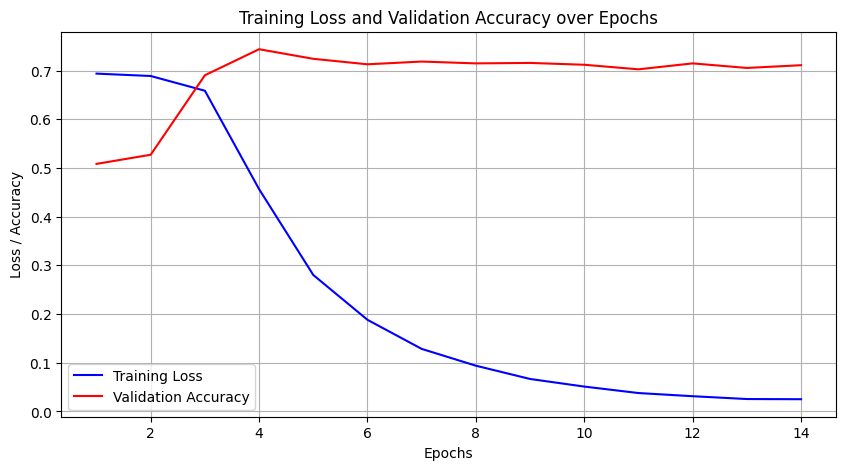

In [10]:
plot_loss_accuracy(losses, accuracies)

In [11]:
mean_max_tst_accuracy = validate(model, tst_dataloader)

Accuracy: 0.7523


# Results

In [12]:
print(f"Max Pool Test Accuracy:    {mean_max_tst_accuracy:.4f}")

Max Pool Test Accuracy:    0.7523


From the above results, it is evident that implementing the OOV mitigation solution from Part 1 has improved the accuracy of the models

| Part 3.1 Accuracy | Part 3.1 Accuracy |
| --- | --- |
| 0.7270 | 0.7523 |